# Logistic Regression

**Logistic Regression** is a statistical method used for **binary classification**, where the target variable has two categories (e.g., 0 and 1). It predicts the **probability of an outcome** using the following steps:

1. **Model Equation**:  
   Logistic regression models the relationship between the input features \( X \) and the output \( y \) using a linear equation:
   \[
   z = \theta^T X
   \]
   The output is then transformed using the **sigmoid function**:
   \[
   h_\theta(X) = \frac{1}{1 + e^{-z}}
   \]

2. **Cost Function**:  
   The model is optimized by minimizing the binary cross-entropy loss:
   \[
   J(\theta) = -\frac{1}{m} \sum_{i=1}^m \left[ y^{(i)} \log(h_\theta(X^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(X^{(i)})) \right]
   \]

3. **Prediction**:  
   The predicted probability is compared to a threshold (commonly 0.5) to determine the class:
   - \( h_\theta(X) \geq 0.5 \): Class 1  
   - \( h_\theta(X) < 0.5 \): Class 0

4. **Applications**:  
   Logistic regression is widely used in tasks such as **spam detection**, **medical diagnosis**, and **customer churn prediction**.

**Advantages**: Simple, interpretable, works well for linearly separable data.  
**Limitations**: Struggles with non-linear relationships without feature transformation.


In [167]:
import pandas as pd
import matplotlib.pyplot as plt

In [169]:
df= pd.read_csv('loan_data.csv')
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [117]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [173]:
df1 = df.drop(['person_education', 'person_emp_exp', 'person_home_ownership', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'previous_loan_defaults_on_file'], axis=1)
df1.head()

,person_age,person_gender,person_income,loan_amnt,loan_intent,credit_score,loan_status
0,22.0,female,71948.0,35000.0,PERSONAL,561,1
1,21.0,female,12282.0,1000.0,EDUCATION,504,0
2,25.0,female,12438.0,5500.0,MEDICAL,635,1
3,23.0,female,79753.0,35000.0,MEDICAL,675,1
4,24.0,male,66135.0,35000.0,MEDICAL,586,1


{'whiskers': [<matplotlib.lines.Line2D at 0x2464704ec10>,
 'caps': [<matplotlib.lines.Line2D at 0x2464708ad50>,
 'boxes': [<matplotlib.lines.Line2D at 0x2464704e390>],
 'medians': [<matplotlib.lines.Line2D at 0x2464708b610>],
 'fliers': [<matplotlib.lines.Line2D at 0x24647088fd0>],
 'means': []}

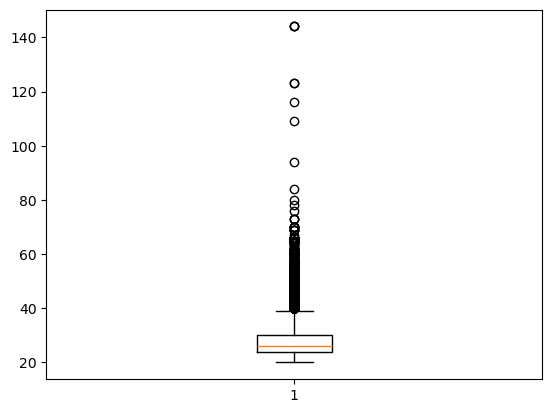

In [175]:
plt.boxplot(df['person_age'])

In [177]:
# Replace invalid values with NaN
df1.loc[df1['person_age'] >50, 'person_age'] = None

In [179]:
df1['person_age'].max()

50.0

In [181]:
df1 = df1.dropna()

In [183]:
len(df1)

44672

{'whiskers': [<matplotlib.lines.Line2D at 0x2464850bbd0>,
 'caps': [<matplotlib.lines.Line2D at 0x2464850f810>,
 'boxes': [<matplotlib.lines.Line2D at 0x2464850a090>],
 'medians': [<matplotlib.lines.Line2D at 0x246485b9610>],
 'fliers': [<matplotlib.lines.Line2D at 0x246485b8ad0>],
 'means': []}

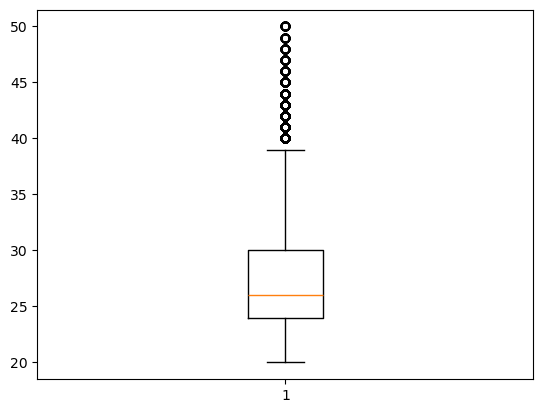

In [185]:
plt.boxplot(df1['person_age'])

<Axes: xlabel='person_gender'>

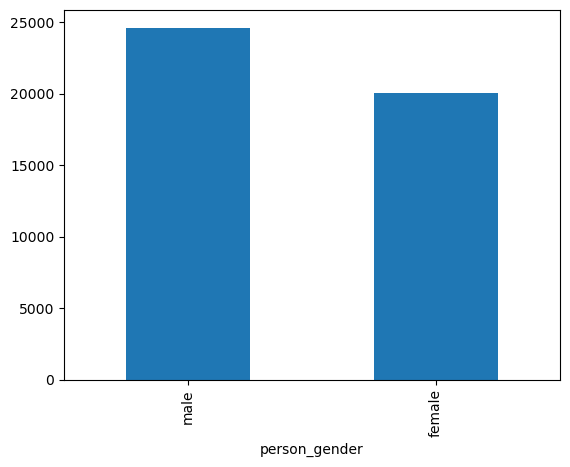

In [187]:
df1['person_gender'].value_counts().plot(kind = 'bar')

<Axes: xlabel='loan_intent'>

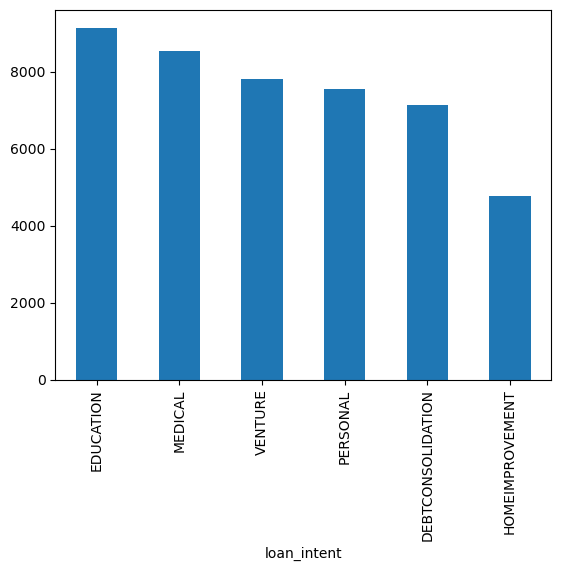

In [189]:
df['loan_intent'].value_counts().plot(kind = 'bar')

In [191]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44672 entries, 0 to 44999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   person_age     44672 non-null  float64
 1   person_gender  44672 non-null  object 
 2   person_income  44672 non-null  float64
 3   loan_amnt      44672 non-null  float64
 4   loan_intent    44672 non-null  object 
 5   credit_score   44672 non-null  int64  
 6   loan_status    44672 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 2.7+ MB


<Axes: xlabel='loan_status'>

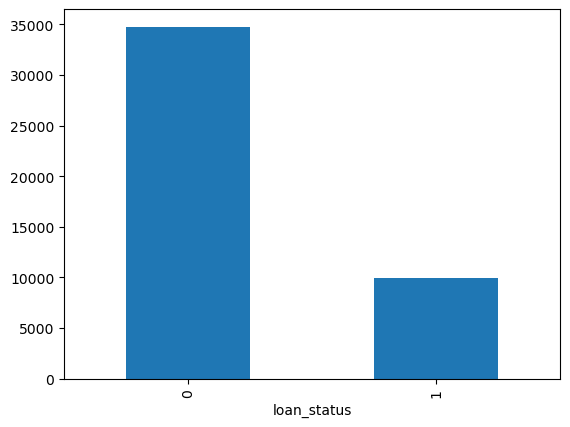

In [193]:
df1['loan_status'].value_counts().plot(kind = "bar")

In [195]:
import seaborn as sns

In [201]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [203]:
X= df1.drop(columns='loan_status',axis=1)
X.head()

,person_age,person_gender,person_income,loan_amnt,loan_intent,credit_score
0,22.0,female,71948.0,35000.0,PERSONAL,561
1,21.0,female,12282.0,1000.0,EDUCATION,504
2,25.0,female,12438.0,5500.0,MEDICAL,635
3,23.0,female,79753.0,35000.0,MEDICAL,675
4,24.0,male,66135.0,35000.0,MEDICAL,586


In [205]:
y = df1['loan_status'].values
y

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [207]:
from sklearn.model_selection import train_test_split

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23, test_size=0.3)

In [211]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [213]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [1, 4])
], remainder='passthrough')

# Step 2: Define the Linear Regression model
step2 = LogisticRegression()

# Step 3: Create the pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Step 4: Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Step 5: Predict on the test data
y_pred = pipe.predict(X_test)


C:\Users\aakas\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [215]:
accuracy_score(y_test, y_pred)

0.7983883002536935

In [217]:
cm = classification_report(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.80      0.98      0.88     10354
           1       0.74      0.18      0.28      3048

    accuracy                           0.80     13402
   macro avg       0.77      0.58      0.58     13402
weighted avg       0.79      0.80      0.75     13402

